# Introduction

## Problem statement and justification for the proposed approach.

# Libraries

#### Add requirments.txt later

In [123]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# EDA

In [124]:
df =  pd.read_csv('World-Stock-Prices-Dataset.csv')

In [125]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-06-12 00:00:00-04:00,7.260000,7.350000,6.990000,7.320000,9906900.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-06-12 00:00:00-04:00,103.129997,103.889999,101.290001,103.660004,1262400.0,0.0,0.0,crocs,CROX,footwear,usa,NaN
2,2025-06-12 00:00:00-04:00,72.250000,72.400002,71.599998,72.239998,12748000.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
3,2025-06-12 00:00:00-04:00,118.790001,119.610001,118.480003,118.650002,33400.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
4,2025-06-12 00:00:00-04:00,296.670013,298.579987,294.000000,297.989990,1604000.0,0.0,0.0,american express,AXP,finance,usa,NaN


In [126]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64
Dividends,float64
Stock Splits,float64
Brand_Name,object
Ticker,object


In [127]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [128]:
df.dtypes

,0
Date,"datetime64[ns, UTC]"
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64
Dividends,float64
Stock Splits,float64
Brand_Name,object
Ticker,object


In [129]:

df_filtered = df.copy()
df_filtered = df_filtered[df_filtered["Country"] == "usa"]
df_filtered = df_filtered.drop(['Brand_Name', 'Capital Gains', 'Country', 'Industry_Tag', 'Stock Splits', 'Dividends'], axis=1)
df_filtered.head()


,Date,Open,High,Low,Close,Volume,Ticker
0,2025-06-12 04:00:00+00:00,7.260000,7.350000,6.990000,7.320000,9906900.0,PTON
1,2025-06-12 04:00:00+00:00,103.129997,103.889999,101.290001,103.660004,1262400.0,CROX
2,2025-06-12 04:00:00+00:00,72.250000,72.400002,71.599998,72.239998,12748000.0,KO
4,2025-06-12 04:00:00+00:00,296.670013,298.579987,294.000000,297.989990,1604000.0,AXP
6,2025-06-12 04:00:00+00:00,372.230011,374.170013,369.549988,371.399994,4868200.0,V


In [130]:
df_filtered.set_index('Date', inplace=True)
df_filtered.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2025-06-12 04:00:00+00:00,7.260000,7.350000,6.990000,7.320000,9906900.0,PTON
2025-06-12 04:00:00+00:00,103.129997,103.889999,101.290001,103.660004,1262400.0,CROX
2025-06-12 04:00:00+00:00,72.250000,72.400002,71.599998,72.239998,12748000.0,KO
2025-06-12 04:00:00+00:00,296.670013,298.579987,294.000000,297.989990,1604000.0,AXP
2025-06-12 04:00:00+00:00,372.230011,374.170013,369.549988,371.399994,4868200.0,V


In [131]:
df_filtered.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Ticker,0


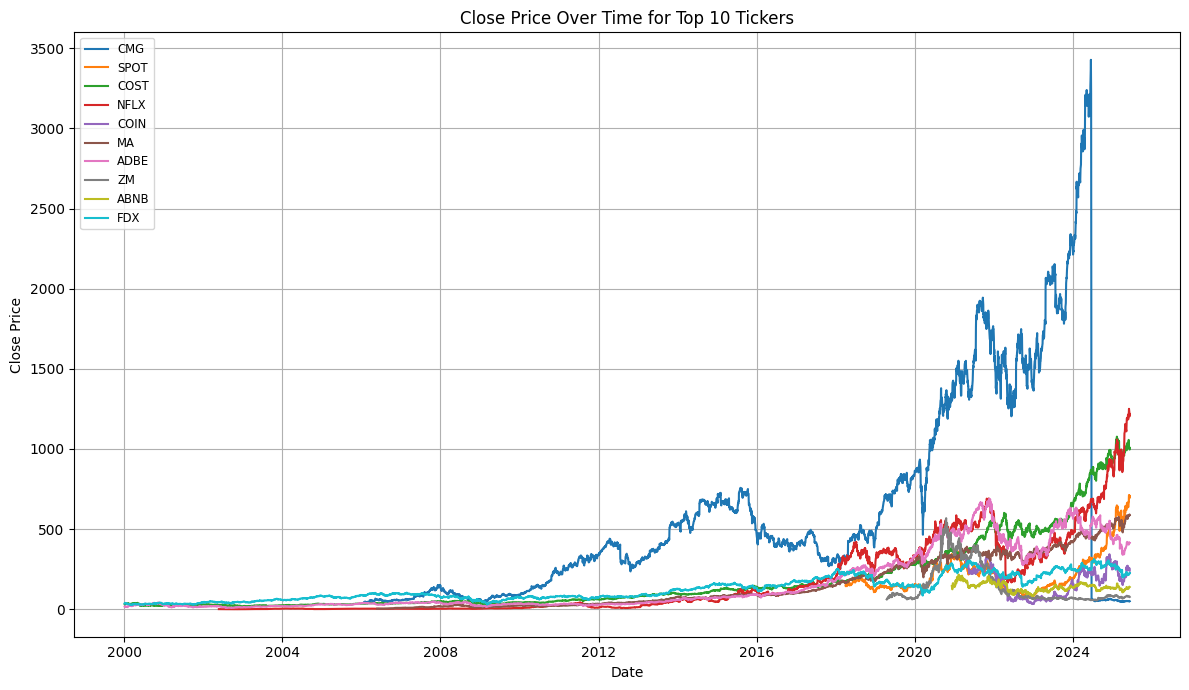

In [132]:
top_tickers = (
    df_filtered.groupby("Ticker")["Close"]
    .mean()
    .nlargest(10)
    .index
)

plt.figure(figsize=(12, 7))
for ticker in top_tickers:
    df_ticker = df_filtered[df_filtered["Ticker"] == ticker]
    plt.plot(df_ticker.index, df_ticker["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Price Over Time for Top 10 Tickers")
plt.legend(loc="upper left", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


In [133]:
df_stock = df_filtered[df_filtered["Ticker"] == "NFLX"].copy()
df_stock = df_stock.sort_index()

In [134]:
df_stock.head()

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2002-05-23 04:00:00+00:00,1.156429,1.242857,1.145714,1.196429,104790000.0,NFLX
2002-05-24 04:00:00+00:00,1.214286,1.225000,1.197143,1.210000,11104800.0,NFLX
2002-05-28 04:00:00+00:00,1.213571,1.232143,1.157143,1.157143,6609400.0,NFLX
2002-05-29 04:00:00+00:00,1.164286,1.164286,1.085714,1.103571,6757800.0,NFLX
2002-05-30 04:00:00+00:00,1.107857,1.107857,1.071429,1.071429,10154200.0,NFLX


In [135]:
df_fe = df_stock.copy()

df_fe['Close_lag_1'] = df_fe['Close'].shift(1)

df_fe['Return_1d'] = df_fe['Close'].pct_change()

df_fe['MA_5'] = df_fe['Close'].rolling(window=5).mean()
df_fe['MA_20'] = df_fe['Close'].rolling(window=20).mean()

df_fe['Volatility_10d'] = df_fe['Close'].rolling(window=10).std()

df_fe['Volume_MA_10'] = df_fe['Volume'].rolling(window=10).mean()
df_fe['Volume_Ratio'] = df_fe['Volume'] / df_fe['Volume_MA_10']

df_fe.dropna(inplace=True)
features = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'Close_lag_1', 'Return_1d',
    'MA_5', 'MA_20',
    'Volatility_10d',
    'Volume_Ratio'
]


# Data preparation & Feature engineering – data pre-processing – missing values, outliers, etc.
# Feature Selection – how were the features selected based on the data analysis?

# Model Training
## selection, comparison, tuning, and analysis – consider ensembles.

## I. Logistic Regression

## II. LSTM

In [136]:
features = [
    'Open', 'High', 'Low', 'Close']
df_stock = df_fe[features]

In [137]:
train_size = int(len(df_stock) * 0.8)
df_train = df_stock.iloc[:train_size]
df_test = df_stock.iloc[train_size:]

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train)

In [138]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, features.index('Close')]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 20
X_train, y_train = create_sequences(scaled_train, seq_length)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

In [139]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel(input_size=len(features), hidden_size=128)

In [140]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.0626
Epoch 10, Loss: 0.0014
Epoch 20, Loss: 0.0033
Epoch 30, Loss: 0.0009
Epoch 40, Loss: 0.0005


In [141]:
scaled_test = scaler.transform(df_test[features])
input_seq = scaled_train[-seq_length:].copy()
future_preds = []

for i in range(len(df_test)):
    input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        next_scaled = model(input_tensor).item()

    actual_next_row = scaled_test[i].copy()
    actual_next_row[features.index('Close')] = next_scaled

    future_preds.append(actual_next_row.copy())
    input_seq = np.vstack([input_seq[1:], actual_next_row])



In [142]:
pred_arr = np.array(future_preds).reshape(-1, len(features))
predicted_closes = scaler.inverse_transform(pred_arr)[:, features.index('Close')]


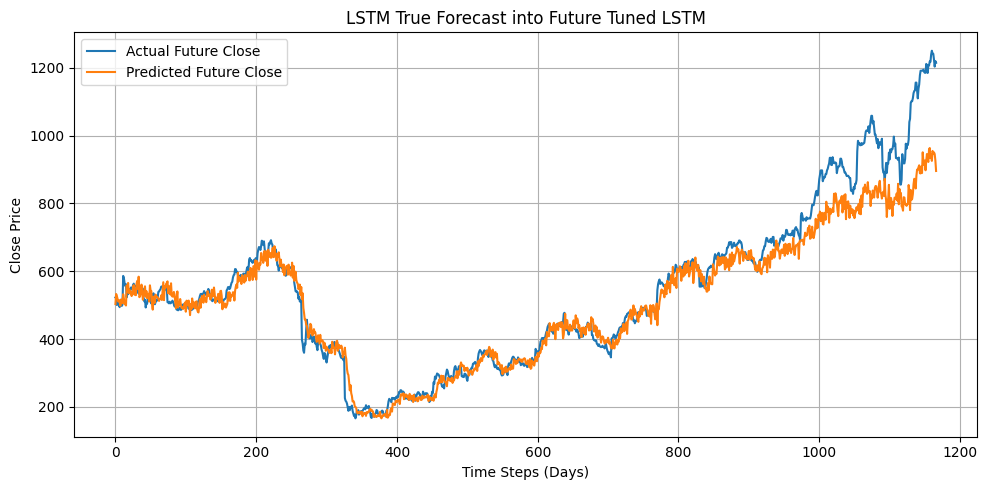

In [144]:
actual_closes = df_test['Close'].values

plt.figure(figsize=(10, 5))
plt.plot(actual_closes, label='Actual Future Close')
plt.plot(predicted_closes, label='Predicted Future Close')
plt.title("LSTM True Forecast into Future Tuned LSTM")
plt.xlabel("Time Steps (Days)")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Evaluation
##  performance measures, results, and conclusions.

## I. Logistic Regression

## II. LSTM

# Model Selection

## I. Logistic Regression

## II. LSTM

# Deployment - A discussion of either the hypothetical deployment of the model or the actual deployment of the model if it has been deployed.

# Discussion and conclusions – address the problem statement and recommendation.